In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import re
import nltk
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import accuracy_score,classification_report

In [2]:
dataset = pd.read_csv(r"C:\Users\S.V.D.H.E.N.P\Downloads\spam.tsv",delimiter = '\t')

In [3]:
dataset.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
ps = PorterStemmer()

In [5]:
review = dataset["v2"][0]

In [6]:
review

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [7]:
review = review.lower()

In [8]:
review

'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...'

In [9]:
review = re.sub('[^a-z]'," ",review)

In [10]:
review

'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   '

In [11]:
review = review.split()

In [12]:
review

['go',
 'until',
 'jurong',
 'point',
 'crazy',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'there',
 'got',
 'amore',
 'wat']

In [13]:
review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

In [14]:
review

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [15]:
sw = stopwords.words("english")

In [16]:
'until' in sw

True

In [17]:
review = [word for word in review if word not in sw]

In [18]:
review

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [19]:
review

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat']

In [20]:
review = ' '.join(review)

In [21]:
review

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [22]:
data = []
for i in range(0,1000):
    review = dataset["v2"][i]
    review = review.lower()
    review = re.sub('[^a-z]'," ",review)
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)

In [23]:
data

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [24]:
dataset['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [25]:
corpus = " ".join(dataset["v2"])

In [26]:
corpus.split()

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...',
 'Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'then',
 'say...',
 'Nah',
 'I',
 "don't",
 'think',
 'he',
 'goes',
 'to',
 'usf,',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back!',
 "I'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send,',
 '�1.50',
 'to',
 'rcv',
 '

In [27]:
word_count = {}

for word in corpus.split():
    if word in word_count:
        word_count[word] = word_count[word] + 1
    else:
        word_count[word] = 1

In [28]:
word_count

{'Go': 14,
 'until': 26,
 'jurong': 1,
 'point,': 1,
 'crazy..': 1,
 'Available': 3,
 'only': 147,
 'in': 798,
 'bugis': 4,
 'n': 137,
 'great': 75,
 'world': 17,
 'la': 2,
 'e': 71,
 'buffet...': 1,
 'Cine': 1,
 'there': 118,
 'got': 204,
 'amore': 1,
 'wat...': 12,
 'Ok': 97,
 'lar...': 18,
 'Joking': 1,
 'wif': 26,
 'u': 692,
 'oni...': 2,
 'Free': 39,
 'entry': 25,
 '2': 453,
 'a': 1327,
 'wkly': 10,
 'comp': 10,
 'to': 2134,
 'win': 38,
 'FA': 4,
 'Cup': 3,
 'final': 13,
 'tkts': 4,
 '21st': 3,
 'May': 16,
 '2005.': 3,
 'Text': 42,
 '87121': 4,
 'receive': 34,
 'question(std': 2,
 'txt': 75,
 "rate)T&C's": 2,
 'apply': 15,
 "08452810075over18's": 2,
 'U': 299,
 'dun': 46,
 'say': 72,
 'so': 294,
 'early': 24,
 'hor...': 2,
 'c': 44,
 'already': 45,
 'then': 146,
 'say...': 3,
 'Nah': 7,
 'I': 1466,
 "don't": 110,
 'think': 113,
 'he': 127,
 'goes': 26,
 'usf,': 2,
 'lives': 2,
 'around': 53,
 'here': 75,
 'though': 15,
 'FreeMsg': 5,
 'Hey': 76,
 'darling': 4,
 "it's": 53,
 'been'

In [29]:
top_15_word = pd.Series(corpus.split()).value_counts().head(15)

In [30]:
top_15_word

to      2134
you     1622
I       1466
a       1327
the     1197
and      857
in       798
is       781
i        742
u        692
for      644
my       628
of       591
your     560
me       557
dtype: int64

<AxesSubplot:>

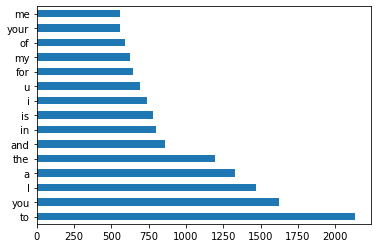

In [31]:
top_15_word.plot(kind = "barh")

In [32]:
pd.Series(corpus.split()).value_counts()

to        2134
you       1622
I         1466
a         1327
the       1197
          ... 
page.        1
DIDN'T       1
rupaul       1
TOOL!        1
Rofl.        1
Length: 15583, dtype: int64

In [33]:
pd.Series(corpus.split()).nunique()

15583

In [34]:
ps = PorterStemmer()

In [35]:
ps.stem("crazy")

'crazi'

In [36]:
ps.stem("Available")

'avail'

In [37]:
ss = SnowballStemmer("english")

In [38]:
ss.stem("crazy")

'crazi'

In [39]:
ss.stem("Available")

'avail'

In [40]:
wc = WordCloud( background_color='white')

In [41]:
review_wordcloud = wc.generate(corpus)

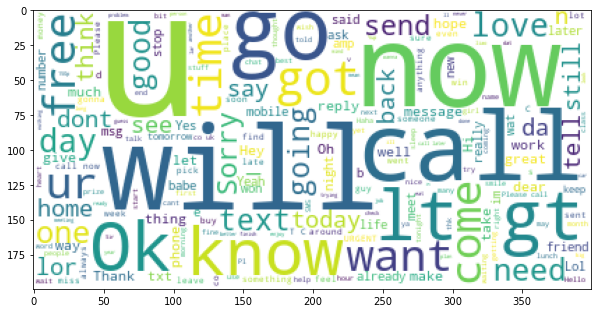

In [42]:
plt.figure(figsize=(10,10))
plt.imshow(review_wordcloud)
plt.show()

In [43]:
cv = CountVectorizer()

In [44]:
x = cv.fit_transform(dataset["v2"]).toarray()

In [45]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
x.shape

(5572, 8625)

In [47]:
y = dataset.iloc[:,1:2].values

In [48]:
y

array([['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
       ['Ok lar... Joking wif u oni...'],
       ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
       ...,
       ['Pity, * was in mood for that. So...any other suggestions?'],
       ["The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"],
       ['Rofl. Its true to its name']], dtype=object)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
nn_model = Sequential()

In [51]:
x_train.shape

(4457, 8625)

In [52]:
inp_layer = Dense(input_dim = x_train.shape[1], kernel_initializer = "random_uniform", activation = "relu", units = 20)

In [53]:
nn_model.add(inp_layer)

In [54]:
hidden_layer_1 = Dense(kernel_initializer = "random_uniform",activation = "relu",units = 100)

In [55]:
nn_model.add(hidden_layer_1)

In [56]:
nn_model.add(Dropout(0.1))

In [57]:
hidden_layer_2 = Dense(kernel_initializer = "random_uniform",activation = "relu",units = 30)
nn_model.add(hidden_layer_2)

In [58]:
output_layer = Dense(kernel_initializer = "random_uniform",activation = "sigmoid",units = 1)

In [59]:
nn_model.add(output_layer)

In [60]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                172520    
                                                                 
 dense_1 (Dense)             (None, 100)               2100      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 30)                3030      
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 177,681
Trainable params: 177,681
Non-trainable params: 0
_________________________________________________________________


In [61]:
tf.keras.utils.plot_model(nn_model, show_shapes=True,
    show_layer_names=True, rankdir='TB')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [62]:
rms_prop = RMSprop()

In [63]:
adam = Adam(learning_rate=0.001,
    beta_1=0.85,
    beta_2=0.97,
    epsilon=1e-07)

In [64]:
nn_model.compile(loss ="binary_crossentrophy",optimizer = adam, metrics = ["accuracy"])

In [65]:
tf.keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="binary_crossentropy",
)

In [66]:
training_history = nn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 10, batch_size = 32)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 240, in __call__
        self.build(y_pred)
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 182, in build
        self._losses = tf.nest.map_structure(
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\engine\compile_utils.py", line 353, in _get_loss_object
        loss = losses_mod.get(loss)
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 2649, in get
        return deserialize(identifier)
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\losses.py", line 2603, in deserialize
        return deserialize_keras_object(
    File "C:\Users\S.V.D.H.E.N.P\AppData\Roaming\Python\Python39\site-packages\keras\utils\generic_utils.py", line 769, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: binary_crossentrophy. Please ensure this object is passed to the `custom_objects` argument. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
training_history.history

In [ ]:
losses = training_history.history["loss"]

In [ ]:
epochs = list(range(1,51))

In [ ]:
plt.plot(epochs,losses)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.show()

In [67]:
train_acc = training_history.history["accuracy"]

NameError: name 'training_history' is not defined

In [ ]:
plt.plot(epochs,train_acc)
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.show()

In [ ]:
val_acc = training_history.history["val_accuracy"]

In [ ]:
plt.plot(epochs,val_acc,label="Test Data Accuracy")
plt.plot(epochs,train_acc,label="Train Data Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
x_test

In [ ]:
y_pred = nn_model.predict(x_test)

In [ ]:
y_pred

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
nn_model.save("spam_classification.h5")